In [1]:
# Import required libraries for data manipulation, model building, and evaluation
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Step 1: Load the dataset from an Excel file into a pandas DataFrame
df = pd.read_excel("classification_dataset.xlsx")

In [3]:
df.head()

,FirmID,debt_to_equity,current_ratio,return_on_assets,price_to_earnings,interest_coverage,asset_turnover,market_to_book,operating_margin,default_flag
0,1,-1.732538,5.260112,-2.952194,-4.603768,2.235848,1.928893,-0.101845,3.193487,0
1,2,2.072914,2.240572,-1.385104,-2.514962,-0.984756,1.436260,-1.255271,2.089872,0
2,3,-0.263106,1.527781,-1.872414,-0.028009,1.612809,3.264194,-1.296421,1.537870,0
3,4,-0.164349,-0.550131,-0.019503,-0.765000,2.273523,2.084217,-0.321931,0.426253,0
4,5,-1.419423,1.015324,-0.864441,-0.009297,0.385404,0.449093,-0.029007,-1.902917,1


In [4]:
# Step 2: Define independent variables (X) by dropping 'FirmID' and the target 'default_flag'
X = df.drop(columns=["FirmID", "default_flag"])  # Independent variables (features)
# Define the dependent variable (y) as the 'default_flag', which indicates whether a firm defaulted
y = df["default_flag"]  # Target variable (0 for no default, 1 for default)

In [5]:
X.head()

,debt_to_equity,current_ratio,return_on_assets,price_to_earnings,interest_coverage,asset_turnover,market_to_book,operating_margin
0,-1.732538,5.260112,-2.952194,-4.603768,2.235848,1.928893,-0.101845,3.193487
1,2.072914,2.240572,-1.385104,-2.514962,-0.984756,1.436260,-1.255271,2.089872
2,-0.263106,1.527781,-1.872414,-0.028009,1.612809,3.264194,-1.296421,1.537870
3,-0.164349,-0.550131,-0.019503,-0.765000,2.273523,2.084217,-0.321931,0.426253
4,-1.419423,1.015324,-0.864441,-0.009297,0.385404,0.449093,-0.029007,-1.902917


In [6]:
# Step 3: Split the dataset into training and testing sets to evaluate the model's performance on unseen data
# 80% of the data will be used for training, and 20% for testing; random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Initialize the Random Forest Classifier with 100 decision trees
# random_state ensures reproducibility, and oob_score=True enables Out-of-Bag scoring for validation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)

In [8]:
# Step 5: Train the Random Forest model using the training data (X_train and y_train)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [9]:
# Step 5.1: Print a custom summary of the trained Random Forest model
print("\n--- Random Forest Model Summary ---")
print(f"Number of Trees (Estimators): {len(rf_classifier.estimators_)}")
print(f"Maximum Depth of Trees: {[estimator.tree_.max_depth for estimator in rf_classifier.estimators_[:5]]} (example from first 5 trees)")
print(f"Number of Features Used: {rf_classifier.n_features_in_}")
print(f"Feature Names: {list(X.columns)}")
print(f"Out-of-Bag Score: {rf_classifier.oob_score_:.4f}")


--- Random Forest Model Summary ---
Number of Trees (Estimators): 100
Maximum Depth of Trees: [15, 12, 15, 12, 15] (example from first 5 trees)
Number of Features Used: 8
Feature Names: ['debt_to_equity', 'current_ratio', 'return_on_assets', 'price_to_earnings', 'interest_coverage', 'asset_turnover', 'market_to_book', 'operating_margin']
Out-of-Bag Score: 0.8950


In [10]:
# Step 6: Make predictions on the unseen test set (X_test) to assess the model's generalization ability
y_pred = rf_classifier.predict(X_test)

In [11]:
# Step 7: Evaluate the model's performance using various metrics
# Print a detailed classification report, including precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_test, y_pred))
# Print the overall accuracy score, which is the proportion of correctly classified instances
print("Accuracy Score:", accuracy_score(y_test, y_pred))
# Print the Out-of-Bag (OOB) score, which is an internal validation score calculated during training
print("OOB Score (validation without test set):", rf_classifier.oob_score_)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91        98
           1       0.89      0.94      0.91       102

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

Accuracy Score: 0.91
OOB Score (validation without test set): 0.895


In [12]:
# Step 7A: Print a custom model summary for better interpretability
print("\n--- Random Forest Model Summary ---")
print(f"Number of Trees (n_estimators): {rf_classifier.n_estimators}")
print(f"Maximum Tree Depth: {rf_classifier.max_depth}")
print(f"Number of Features Used at Each Split (max_features): {rf_classifier.max_features}")
print(f"Out-of-Bag Score Enabled?: {rf_classifier.oob_score}")
print(f"Random State: {rf_classifier.random_state}")
print(f"Number of Training Samples: {X_train.shape[0]}")
print(f"Number of Testing Samples: {X_test.shape[0]}")
print(f"Feature Names: {list(X.columns)}")
print(f"Feature Importances: {rf_classifier.feature_importances_}")


--- Random Forest Model Summary ---
Number of Trees (n_estimators): 100
Maximum Tree Depth: None
Number of Features Used at Each Split (max_features): sqrt
Out-of-Bag Score Enabled?: True
Random State: 42
Number of Training Samples: 800
Number of Testing Samples: 200
Feature Names: ['debt_to_equity', 'current_ratio', 'return_on_assets', 'price_to_earnings', 'interest_coverage', 'asset_turnover', 'market_to_book', 'operating_margin']
Feature Importances: [0.17774396 0.32156952 0.07219085 0.08979193 0.07776321 0.07976468
 0.07566743 0.10550844]



--- Top Feature Importances ---
             Feature  Importance
1      current_ratio    0.321570
0     debt_to_equity    0.177744
7   operating_margin    0.105508
3  price_to_earnings    0.089792
5     asset_turnover    0.079765
4  interest_coverage    0.077763
6     market_to_book    0.075667
2   return_on_assets    0.072191


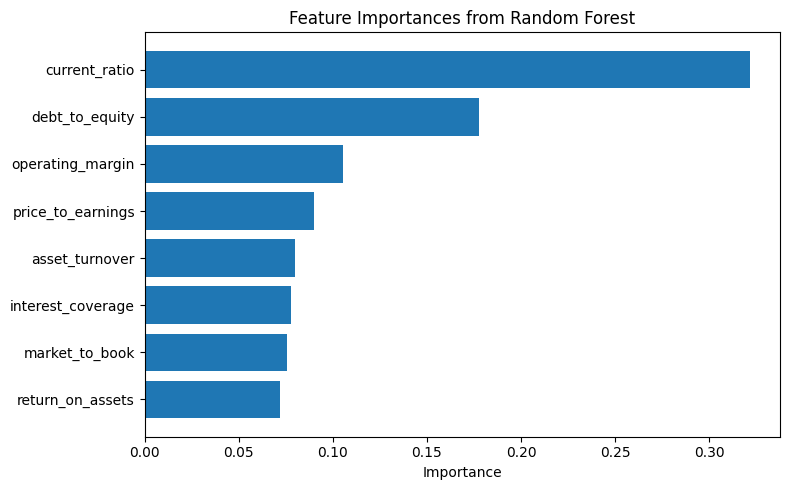

In [13]:
# Step 8: Feature importance
import matplotlib.pyplot as plt

importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\n--- Top Feature Importances ---")
print(importance_df)

# Plot (optional)
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
